In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import flopy

config = {'font.family': 'Arial',
          'font.size': 13,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'mathtext.fontset': 'stix',
         }
plt.rcParams.update(config)

results = np.load(f"./output/results.npy")
porosity = np.load(f"./output/results_porosity.npy")
K = np.load(f"./output/results_K.npy")

MIN3P_output = pd.read_csv("./input_data/MIN3P_output.csv")

# sim = flopy.mf6.MFSimulation.load(sim_ws="./simulation/", sim_name="model", verbosity_level=0)
# head = sim.get_model("gwf_model").output.head().get_alldata()

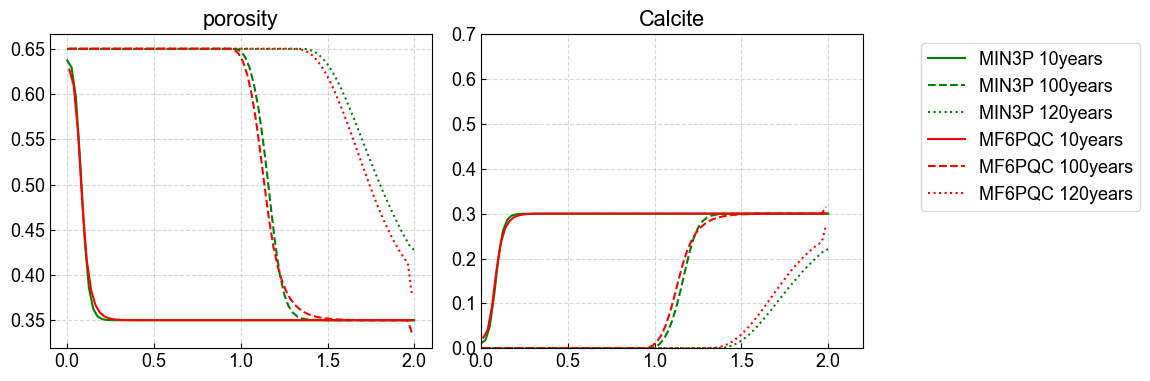

In [22]:
L = 2.0
dx = 0.025
n_mf6 = 80
n_min3p = 81

x_mf6 = np.linspace(dx/2, L - dx/2, n_mf6)
x_min3p = np.linspace(0, L, n_min3p)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(x_min3p, MIN3P_output["Porosity 10years"], c='green', linestyle='-', label='MIN3P 10years')
axes[0].plot(x_min3p, MIN3P_output["Porosity 100years"], c='green', linestyle='--', label='MIN3P 100years')
axes[0].plot(x_min3p, MIN3P_output["Porosity 120years"], c='green', linestyle=':', label='MIN3P 120years')
# axes[0].plot(x_mf6, porosity[-1], label='MF6PQC', c='red', linestyle='-')
axes[0].plot(x_mf6, porosity[1000*10], c='red', linestyle='-', label='MF6PQC 10years')
axes[0].plot(x_mf6, porosity[1000*100], c='red', linestyle='--', label='MF6PQC 100years')
axes[0].plot(x_mf6, porosity[1000*120], c='red', linestyle=':', label='MF6PQC 120years')
axes[0].set_title("porosity")
axes[0].set_xticks(np.linspace(0, 2, 5))
# axes[0].legend(loc="best", fontsize=12, prop={'family': 'SimSun'})
axes[0].grid(visible=True, which='major', axis='both', alpha=0.5, linestyle='--')
axes[0].set_axisbelow(True)

# axes[1].plot(K[-1])
# axes[1].set_title("K")
# axes[1].set_xticks(np.linspace(0, 80, 5))

axes[1].plot(x_min3p, MIN3P_output["Calcite 10years"], c='green', label='MIN3P 10years')
axes[1].plot(x_min3p, MIN3P_output["Calcite 100years"], c='green', linestyle='--', label='MIN3P 100years')
axes[1].plot(x_min3p, MIN3P_output["Calcite 120years"], c='green', linestyle=':', label='MIN3P 120years')
# axes[1].plot(x_mf6, results[-1, 0, :] / 2.71 * 100.09 / 1000, , c='red', linestyle='-')
axes[1].plot(x_mf6, results[1000*10, 0, :] / 2.71 * 100.09 / 1000, c='red', linestyle='-', label='MF6PQC 10years')
axes[1].plot(x_mf6, results[1000*100, 0, :] / 2.71 * 100.09 / 1000, c='red', linestyle='--', label='MF6PQC 100years')
axes[1].plot(x_mf6, results[1000*120, 0, :] / 2.71 * 100.09 / 1000, c='red', linestyle=':', label='MF6PQC 120years')
axes[1].set_title("Calcite")
axes[1].set_xticks(np.linspace(0, 2, 5))
axes[1].set_ylim(0,0.7)
axes[1].set_xlim(0,2.2)
axes[1].legend(bbox_to_anchor=(1.75, 1), loc='upper right')
axes[1].grid(visible=True, which='major', axis='both', alpha=0.5, linestyle='--')
axes[1].set_axisbelow(True)


# axes[3].plot(x_mf6, head[0, 0, 0, :])
# axes[3].plot(x_min3p, MIN3P_output["Hydraulic head 120years"])
# axes[3].set_title("Head")
# axes[3].set_xticks(np.linspace(0, 2, 5))

plt.tight_layout()
plt.show()
